In [1]:
import pandas as pd

In [2]:
import sys, os

sys.path.append(os.path.abspath(os.path.join("../..")))
sys.path.append(os.path.abspath(os.path.join("../scripts")))

In [3]:
import eda_functions as eda

In [4]:
import preprocess_functions as prep

In [5]:
import dvc.api

# Read Data

In [6]:
#path = 'data/train.csv'
#repo = '../'
#version = 'v1'

#data_url = dvc.api.get_url(path=path, repo=repo, rev=version)
train_data = pd.read_csv('../data/train.csv', low_memory= False)

In [7]:
#path = 'data/test.csv'
#repo = '../'
#version = 'v1'

#data_url = dvc.api.get_url(path=path, repo=repo, rev=version)
test_data = pd.read_csv('../data/test.csv',low_memory= False)

# Summary About Data

## General 

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Date                       1017209 non-null  object 
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [9]:
# set Date column as datetime index

train_data = prep.index_by_date(train_data, 'Date')

# Data Preprocessing
It is important to process the data into a format where it can be fed to a machine learning model. Meaning:
- converting all non-numeric columns to numeric, 
- handling missing values 
- generating new features from already existing features. 

As a final thing, we have to scale the data. This helps with predictions especially when using machine learning algorithms that use Euclidean distances. We will use standard scaler in sklearn for this.

# 1. Add New Columns

In [10]:
# Add Year, Month, DayOfYear, DayOfMonth, IsWeekday, IsWeekend columns
# Add columns that indicate whether the day is in the 
# 1. Begining of the month 'BeginMonth', 
# 2. Middle of the Month 'MidMonth', or 
# 3. end of the Month 'EndMonth'

In [11]:
train_data = prep.date_componants(train_data, train_data.index)
train_data.head(4)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,IsWeekend,Year,Month,DayOfMonth,BeginMonth,MidMonth,EndMonth,WeekOfYear,DayOfYear,IsWeekday
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1115,1,0,0,0,0,a,1,d,c,...,0,2013,1,1,1,1,0,1,1,1
2013-01-01,379,1,0,0,0,0,a,1,d,a,...,0,2013,1,1,1,1,0,1,1,1
2013-01-01,378,1,0,0,0,0,a,1,a,c,...,0,2013,1,1,1,1,0,1,1,1
2013-01-01,377,1,0,0,0,0,a,1,a,c,...,0,2013,1,1,1,1,0,1,1,1


In [12]:
# Add columns that indicate whether the day is in a period
# 1. Before holidays 'BeforeHoliday'
# 2. After holidays 'AfterHoliday'

In [13]:
train_data = prep.days_wrt_holiday(train_data)
train_data.head(4)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Month,DayOfMonth,BeginMonth,MidMonth,EndMonth,WeekOfYear,DayOfYear,IsWeekday,BeforeHoliday,AfterHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1115,1,0,0,0,0,a,1,d,c,...,1,1,1,1,0,1,1,1,0,0
2013-01-01,379,1,0,0,0,0,a,1,d,a,...,1,1,1,1,0,1,1,1,0,0
2013-01-01,378,1,0,0,0,0,a,1,a,c,...,1,1,1,1,0,1,1,1,0,0
2013-01-01,377,1,0,0,0,0,a,1,a,c,...,1,1,1,1,0,1,1,1,0,0


In [14]:
train_data[(train_data['BeforeHoliday']==1)&(train_data['AfterHoliday'] ==1)].index.unique()

DatetimeIndex(['2013-12-30', '2013-12-31', '2014-12-30', '2014-12-31'], dtype='datetime64[ns]', name='Date', freq=None)

# Missing data

In [15]:
eda.missing_values_table(train_data)

Your selected dataframe has 29 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,508031,49.90,float64
Promo2SinceYear,508031,49.90,float64
PromoInterval,508031,49.90,object
CompetitionOpenSinceMonth,323348,31.80,float64
CompetitionOpenSinceYear,323348,31.80,float64
CompetitionDistance,2642,0.30,float64


In [16]:
eda.missing_values_table(train_data[train_data.Promo2 == 1])

Your selected dataframe has 29 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Dtype
CompetitionOpenSinceMonth,184852,36.30,float64
CompetitionOpenSinceYear,184852,36.30,float64
CompetitionDistance,758,0.10,float64


In [17]:
print(train_data[['Store','CompetitionOpenSinceYear','Promo2SinceWeek']].drop_duplicates().Store.nunique(),
     train_data.Store.nunique())

1115 1115


There is a unique date for when each store started running a continuing and consecutive promotion Promo2. The date is missing for stores not participating.

We can replace the date columns with number of weeks since the promotion started

In [18]:
train_data = prep.handle_promo2(train_data)
eda.missing_values_table(train_data)

Your selected dataframe has 27 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Dtype
CompetitionOpenSinceMonth,323348,31.80,float64
CompetitionOpenSinceYear,323348,31.80,float64
CompetitionDistance,2642,0.30,float64


We Add a column 'HasCompetition' for Dates where a store Competition has opened and drop columns 
- CompetitionOpenSinceMonth
- CompetitionOpenSinceYear
- CompetitionDistance

In [19]:
train_data = prep.handle_competition(train_data)
eda.missing_values_table(train_data)

Your selected dataframe has 25 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


In [20]:
eda.missing_values_table(train_data[train_data.HasCompetition == 0])

Your selected dataframe has 25 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


# Do the same steps for Test dataset

1. set Date column as datetime index

In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       41088 non-null  object 
 1   Id                         41088 non-null  int64  
 2   Store                      41088 non-null  int64  
 3   DayOfWeek                  41088 non-null  int64  
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [22]:
# set Date column as datetime index

test_data = prep.index_by_date(test_data, 'Date')

In [23]:
# Add Year, Month, DayOfYear, DayOfMonth, IsWeekday, IsWeekend columns
# Add columns that indicate whether the day is in the 
# 1. Begining of the month 'BeginMonth', 
# 2. Middle of the Month 'MidMonth', or 
# 3. end of the Month 'EndMonth'

test_data = prep.date_componants(test_data, test_data.index)

In [24]:
# Add columns that indicate whether the day is in a period
# 1. Before holidays 'BeforeHoliday'
# 2. After holidays 'AfterHoliday'

test_data = prep.days_wrt_holiday(test_data)
test_data.head(4)

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Month,DayOfMonth,BeginMonth,MidMonth,EndMonth,WeekOfYear,DayOfYear,IsWeekday,BeforeHoliday,AfterHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-01,41088,1115,5,1.00,0,0,1,d,c,"5,350.00",...,8,1,1,1,0,31,213,0,0,0
2015-08-01,40523,378,5,1.00,0,0,0,a,c,"2,140.00",...,8,1,1,1,0,31,213,0,0,0
2015-08-01,40522,377,5,1.00,0,0,0,a,c,100.00,...,8,1,1,1,0,31,213,0,0,0
2015-08-01,40521,373,5,1.00,0,0,0,d,c,"11,120.00",...,8,1,1,1,0,31,213,0,0,0


In [25]:
# Handle missing data connected to promo2 and competition

test_data = prep.handle_promo2(test_data)
test_data = prep.handle_competition(test_data)
eda.missing_values_table(test_data)

Your selected dataframe has 24 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Open,11,0.00,float64


<AxesSubplot:xlabel='Date'>

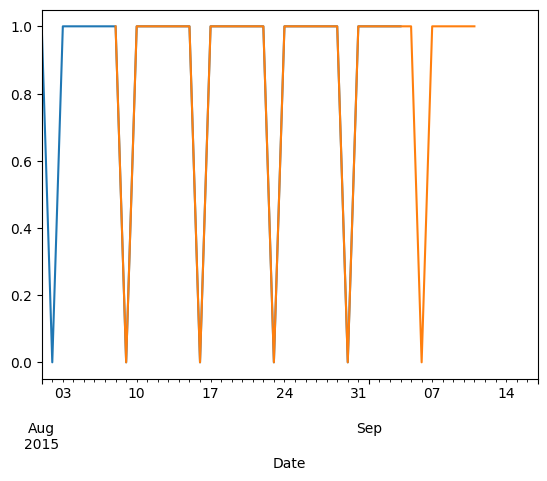

In [26]:
# Missing values in the column Open.
# We can see from the following plot that store opens on regular weekly schedule. 

test_data.loc[test_data.Store == 622, 'Open'].plot()
test_data.loc[test_data.Store == 622, 'Open'].shift(7).plot()

In [27]:
test_data['Open'] = test_data['Open'].fillna(test_data['Open'].shift(7))

In [28]:
eda.missing_values_table(test_data)

Your selected dataframe has 24 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype
